# Relatório Intermediário - Abel Cavalcante
---
Este relatório apresenta o resultado de três projetos, todos calculando o alinhamento de duas sequências de DNA distintas:  
- A primeira usa a Heurística de Alinhamento Local de Smith-Waterman;
- A segunda usa um algoritmo Local para Alinhamento;
- E, por fim, é usado uma técnica de Busca Exaustiva para Alinhamento de Sequências.
---

### Heurística de Alinhamento Local de Smith-Waterman

Nesse primeiro método, foi utilizado a Heurística de Alinhamento Local de Smith-Waterman. Para usá-la e testá-la, uma das sequência foi mantida com tamanho 50 e a outra varia entre 10 e 1.000.000:



In [2]:
import subprocess, os
import matplotlib.pyplot as plt

In [3]:
means1 = []
files = 6

for i in range(files):
    times = []
    for filename in os.listdir(f'entradas_{i+1}'):
        with open(f'entradas_{i+1}/{filename}', 'r') as f:
            proc = subprocess.run(['./her'], stdin=f, stdout=subprocess.PIPE)
            out = proc.stdout.decode('utf-8')

            if 'Tempo' in out:
                times.append(float(out.split('\n')[-2].split(' ')[-2]))

    means1.append(sum(times) / len(times))

Cada tamanho foi testado 10 vezes e foi feita uma média dos tempos obtidos. Assim, foi feito um gráfico juntando o tempo médio para cada tamanho de entrada, em ms:

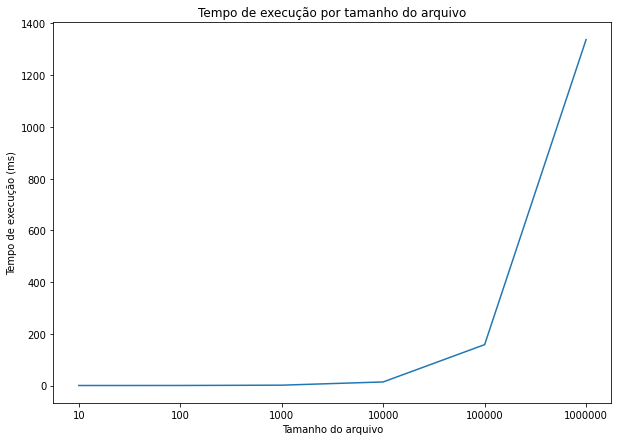

In [4]:
sizes1 = ['10', '100', '1000', '10000', '100000', '1000000']

plt.figure(figsize = (10, 7))
plt.plot(sizes1, means1)
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.show()


É importante salientar que, para tamanhos na magnitude de 10.000.000, o programa começa a falhar:

In [5]:
meansTeste = []
times = []

# Teste com sequências de tamanho 10000000:
for filename in os.listdir(f'entradas_7'):
    with open(f'entradas_7/{filename}', 'r') as f:
        proc = subprocess.run(['./her'], stdin=f, stdout=subprocess.PIPE)
        out = proc.stdout.decode('utf-8')

        if 'Tempo' in out:
            times.append(float(out.split('\n')[-2].split(' ')[-2]))

meansTeste.append(sum(times) / len(times))

print(means1)

ZeroDivisionError: division by zero

Ao explorar mais a fundo, é possível observar que é enviado um 'Killed' para o programa, o que pode-se supor que o poder computacional não é suficiente para comportar o tamanho da entrada ou o código não é otimizado o suficiente paar essas entradas.  
Em questão de otimização, é possível conferir quais partes do programa consomem mais recursos do computador fazendo o profiling:

    g++ -Wall -O3 -g heuristica.cc -o her
    valgrind --tool=callgrind ./her < entradas_3/dna0.seq
    callgrind_annotate callgrind.out.63728 heuristica.cc > analise_calgrind_heuristica

A análise completa ficou dentro do arquivo *analise_calgrind_heuristica*, mas é possível observar que este é o trecho de código que consome mais recursos do computador:

![Heuristica!](Imagens/Analise_Heuristica.png)

Apesar de já ser feito em uma única linha ao invés de uma matriz, essa seria a parte em que o foco em otimização deveria ser feito.

---
### Um algoritmo Local para Alinhamento

No segundo método, foi utilizado um algoritmo Local para Alinhamento, e os mesmos parâmetros do primeiro método foram utilizados:

In [6]:
means2 = []
files = 6

for i in range(files):
    times = []
    for filename in os.listdir(f'entradas_{i+1}'):
        with open(f'entradas_{i+1}/{filename}', 'r') as f:
            proc = subprocess.run(['./ali'], stdin=f, stdout=subprocess.PIPE)
            out = proc.stdout.decode('utf-8')

            if 'Tempo' in out:
                times.append(float(out.split('\n')[-2].split(' ')[-2]))

    means2.append(sum(times) / len(times))

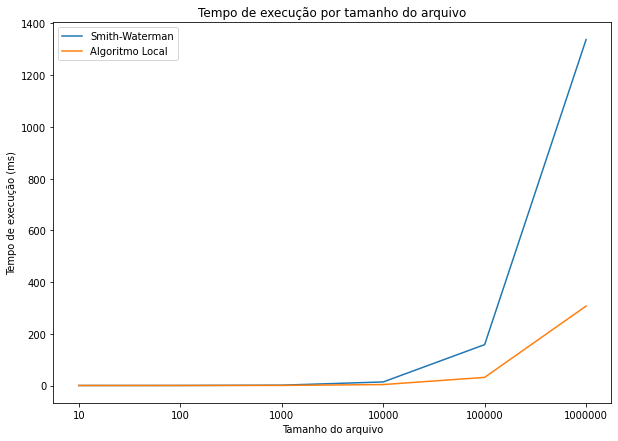

In [7]:
sizes2 = ['10', '100', '1000', '10000', '100000', '1000000']

plt.figure(figsize = (10, 7))
plt.plot(sizes1, means1)
plt.plot(sizes2, means2)
plt.legend(['Smith-Waterman', 'Algoritmo Local'])
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.show()


Como é possível observar, o Algorítmo local, apesar de não apresentar uma solução ótima, é mais rápido, ainda mais quando aumentamos a entrada.

Em questão de otimização, é possível fazer o mesmo processo do método 1:

    g++ -Wall -O3 -g alinhamento.cc -o ali
    valgrind --tool=callgrind ./ali < entradas_3/dna0.seq
    callgrind_annotate callgrind.out.66642 alinhamento.cc > analise_calgrind_local

![Local1!](Imagens/Analise_local_1.png)

![Local2!](Imagens/Analise_local_2.png)

E, novamente, é possível ver que o local que mais consome recursos computacionais é na criação da matriz.

---
### Busca Exaustiva

Por fim, foi feito uma Busca Exaustiva usando os mesmos parâmetros anteriores:

In [12]:
means3 = []
files = 6

for i in range(files):
    times = []
    for filename in os.listdir(f'entradas_{i+1}'):
        with open(f'entradas_{i+1}/{filename}', 'r') as f:
            proc = subprocess.run(['./exaust'], stdin=f, stdout=subprocess.PIPE)
            out = proc.stdout.decode('utf-8')

            if 'Tempo' in out:
                times.append(float(out.split('\n')[-2].split(' ')[-2]))

    means3.append(sum(times) / len(times))

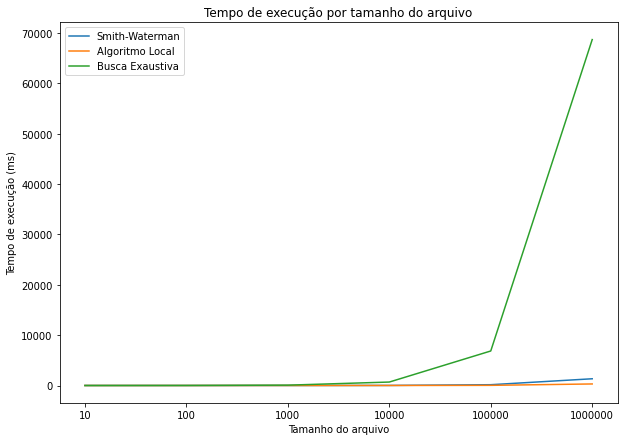

In [13]:
sizes3 = ['10', '100', '1000', '10000', '100000', '1000000']

plt.figure(figsize = (10, 7))
plt.plot(sizes1, means1)
plt.plot(sizes2, means2)
plt.plot(sizes3, means3)
plt.legend(['Smith-Waterman', 'Algoritmo Local', 'Busca Exaustiva'])
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Tempo de execução (ms)')
plt.title('Tempo de execução por tamanho do arquivo')
plt.show()

Como é possível observar, a Busca Exaustiva, apesar de devolver o melhor resultado, é o que mais demora. 